In [298]:
## Chapter 13: Experimenting with Keras and CNN

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten, MaxPooling2D, Conv2D, Input
from keras import backend as K

#  https://keras.io/ >> Für Informationen über weitere Ebenen

batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28, 28

# Datensatz einlesen
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape) # 60.000 Bilder mit 28x28 Pixeln


# X Das Backend von Keras kann ja nach Installation varrieren
# >> Dementsprechend erwartet das Modell einen unterschiedlichen Input der Dimensionen:
#    Entwerder Channel X Reihe X Spalten (image_data_format gibt 'channel_first' zurück) oder Reihe X Spalten X Channel 
#   (image_data_format gibt 'channel_last' zurück) >> Die Channelanzahl ist 1 für ein grayscale Bild
 
# Der nachfolgende Code transformiert Input Daten in das richtige Format 
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print(x_train.shape)

# Datensatz in float umwandeln und Werte standardisieren
x_train = x_train.astype('float32')
x_train = x_train/255
x_test = x_test.astype('float32')
x_test = x_test/255

# Wandelt Label in eine Dummy Variable um > Vektor mit 10 Spalten (für 10 Klassen) mit 0 (nicht diese Kategorie) und 1 (entspricht dieser Kategorie)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


(60000, 28, 28)
(60000, 28, 28, 1)


In [207]:
model = Sequential()

# Fügt Ebene für Ebene zum Modell hinzu (Von Input zu Output)

model.add(Input(input_shape)) # Selbst hinzugefügt, da deprecation Warning mit input_shape = input_shape in Conv2D
model.add(Conv2D(32, kernel_size=(3, 3), # Filter, Kernel-Size
                activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # Dropout-Rate: 25% Wahrscheinlichkeit ein Output fallen zu lassen
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Konfigurieren des Modells
# - legt loss Funktion fest
# - sowie den Optimierungsallgorithmus
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(), 
              metrics=['accuracy'])

print("Model parameters = %d" % model.count_params())
print(model.summary())


Model parameters = 1199882


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

None


In [246]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, # führt zum print output)
                    validation_data=(x_test, y_test)) # Testset hier als Validationset angegeben

# Evaluiert das Modell anhand des Testdatensatzes :D
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1]) # Accuracy ist 5% schlechter als sie sein sollte

Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 109ms/step - accuracy: 0.1288 - loss: 2.2953 - val_accuracy: 0.3961 - val_loss: 2.2563
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 119ms/step - accuracy: 0.2461 - loss: 2.2514 - val_accuracy: 0.4941 - val_loss: 2.1890
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 124ms/step - accuracy: 0.3432 - loss: 2.1842 - val_accuracy: 0.5579 - val_loss: 2.0711
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 114ms/step - accuracy: 0.4159 - loss: 2.0665 - val_accuracy: 0.6174 - val_loss: 1.8631
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 114ms/step - accuracy: 0.4796 - loss: 1.8748 - val_accuracy: 0.6731 - val_loss: 1.5592
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 119ms/step - accuracy: 0.5324 - loss: 1.6316 - val_accuracy: 0.7297 - val_loss: 1.2395
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 114ms/step - accuracy: 0.5824 - loss: 1.3988 - val_accuracy: 0.7722 - val_loss: 0.9964
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 114ms/step - accuracy: 0.6202 - loss: 1

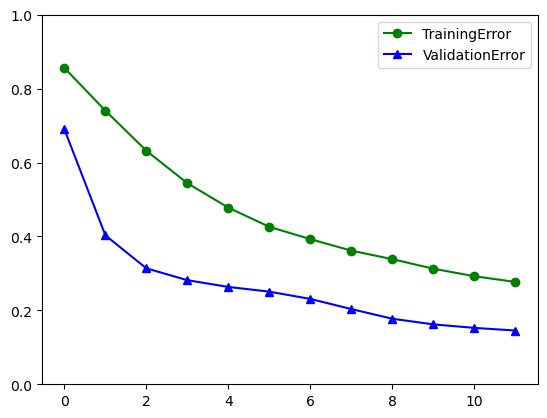

In [214]:
model.save("mnist_cnn_model.keras")

import matplotlib.pyplot as plt

train_err_loss = [1-acc for acc in history.history["accuracy"]]
val_err_loss = [1-acc for acc in history.history["val_accuracy"]]

fig = plt.plot(figsize=(4,8))
line1 = plt.plot(range(0, 12), train_err_loss, "-o", color='green', label="TrainingError")
line2 =plt.plot(range(0, 12), val_err_loss, "-^", color="blue", label="ValidationError")
plt.ylim(0, 1)
plt.legend()



zusätzliche Conv Layer 3 3 64 mit 2.076.554 Parameter

Model parameters = 2076554


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_83 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_84 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 22, 22, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_32 (Flatten)            │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 128)            │     1,982,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,076,554 (7.92 MB)

 Trainable params: 2,076,554 (7.92 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/12
240/240 ━━━━━━━━━━━━━━━━━━━━ 70s 283ms/step - accuracy: 0.1158 - loss: 2.2987 - val_accuracy: 0.1640 - val_loss: 2.2802
Epoch 2/12
240/240 ━━━━━━━━━━━━━━━━━━━━ 71s 297ms/step - accuracy: 0.1820 - loss: 2.2753 - val_accuracy: 0.2310 - val_loss: 2.2524
Epoch 3/12
240/240 ━━━━━━━━━━━━━━━━━━━━ 75s 310ms/step - accuracy: 0.2536 - loss: 2.2448 - val_accuracy: 0.3430 - val_loss: 2.2155
Epoch 4/12
240/240 ━━━━━━━━━━━━━━━━━━━━ 72s 300ms/step - accuracy: 0.3235 - loss: 2.2040 - val_accuracy: 0.5060 - val_loss: 2.1609
Epoch 5/12
240/240 ━━━━━━━━━━━━━━━━━━━━ 74s 307ms/step - accuracy: 0.4021 - loss: 2.1420 - val_accuracy: 0.6290 - val_loss: 2.0722
Epoch 6/12
240/240 ━━━━━━━━━━━━━━━━━━━━ 74s 307ms/step - accuracy: 0.4709 - loss: 2.0431 - val_accuracy: 0.6770 - val_loss: 1.9219
Epoch 7/12
240/240 ━━━━━━━━━━━━━━━━━━━━ 72s 301ms/step - accuracy: 0.5322 - loss: 1.8775 - val_accuracy: 0.7120 - val_loss: 1.6776
Epoch 8/12
240/240 ━━━━━━━━━━━━━━━━━━━━ 74s 310ms/step - accuracy: 0.5855 - lo

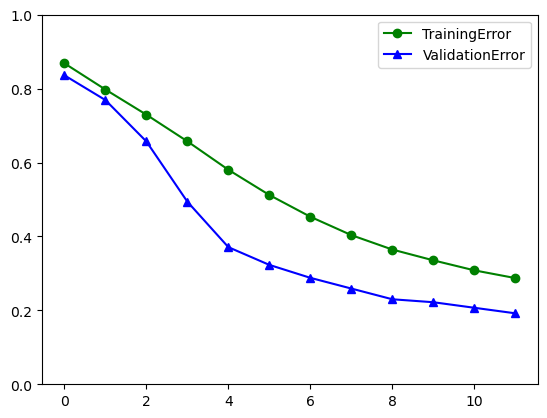

In [284]:
## Experiment 1 mit unterschiedlichen Modell-Architekturen

# verkleinerter Datensatz

x_val = x_test[:1000]
y_val = y_test[:1000]

x_test = x_test[1000:]
y_test = y_test[1000:]


# Wandelt Label in eine Dummy Variable um > Vektor mit 10 Spalten (für 10 Klassen) mit 0 (nicht diese Kategorie) und 1 (entspricht dieser Kategorie)


# a) zusätzliche Conv Layer 3 3 64 # 2.076.554 Parameter
print("zusätzliche Conv Layer 3 3 64 mit 2.076.554 Parameter\n")
model = Sequential()

# Fügt Ebene für Ebene zum Modell hinzu (Von Input zu Output)

model.add(Input(input_shape)) # Selbst hinzugefügt, da deprecation Warning mit input_shape = input_shape in Conv2D
model.add(Conv2D(32, kernel_size=(3, 3), # Filter, Kernel-Size
                activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(), 
              metrics=['accuracy'])

print("Model parameters = %d" % model.count_params())
print(model.summary())


# XX Modell ausführen
history = model.fit(x_train, y_train,
                    batch_size=250,
                    epochs=epochs,
                    verbose=1, # führt zum print output)
                    validation_data=(x_val, y_val)) # Testset hier als Validationset angegeben

# Evaluiert das Modell anhand des Testdatensatzes
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


# XX Modell visualisieren
import matplotlib.pyplot as plt

train_err_loss = [1-acc for acc in history.history["accuracy"]]
val_err_loss = [1-acc for acc in history.history["val_accuracy"]]


fig3 = plt.plot(figsize=(4,8))
line1 = plt.plot(range(0, 12), train_err_loss, "-o", color='green', label="TrainingError")
line2 =plt.plot(range(0, 12), val_err_loss, "-^", color="blue", label="ValidationError")
plt.ylim(0, 1)
plt.legend()


Duplicate Conv2 und Pooling-Layer
Model parameters = 261962


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_101 (Conv2D)             │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_102 (Conv2D)             │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_103 (Conv2D)             │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_38 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261,962 (1023.29 KB)

 Trainable params: 261,962 (1023.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 54ms/step - accuracy: 0.1126 - loss: 2.2979 - val_accuracy: 0.1780 - val_loss: 2.2846
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.1291 - loss: 2.2869 - val_accuracy: 0.1990 - val_loss: 2.2745
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.1522 - loss: 2.2753 - val_accuracy: 0.2880 - val_loss: 2.2632
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.1681 - loss: 2.2638 - val_accuracy: 0.3790 - val_loss: 2.2498
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 52ms/step - accuracy: 0.1940 - loss: 2.2498 - val_accuracy: 0.4380 - val_loss: 2.2339
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.2198 - loss: 2.2332 - val_accuracy: 0.4690 - val_loss: 2.2148
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 52ms/step - accuracy: 0.2438 - loss: 2.2140 - val_accuracy: 0.5150 - val_loss: 2.1918
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.2630 - loss: 2.19

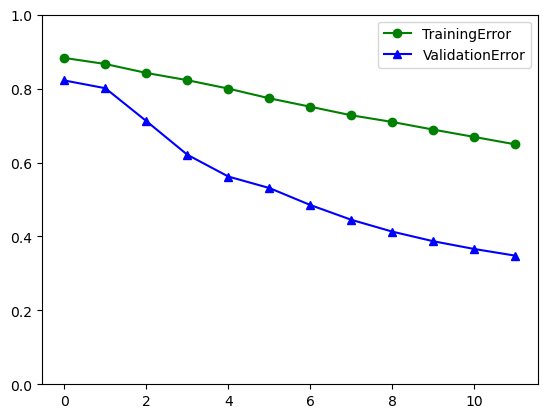

In [300]:
# b) Duplicate Conv2 und Pooling-Layer
print("Duplicate Conv2 und Pooling-Layer")
x_val = x_test[:1000]
y_val = y_test[:1000]

x_test = x_test[1000:]
y_test = y_test[1000:]


# Modell
model = Sequential()

# Fügt Ebene für Ebene zum Modell hinzu (Von Input zu Output)

model.add(Input(input_shape)) # Selbst hinzugefügt, da deprecation Warning mit input_shape = input_shape in Conv2D
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(), 
              metrics=['accuracy'])

print("Model parameters = %d" % model.count_params())
print(model.summary())


# XX Modell ausführen
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, # führt zum print output)
                    validation_data=(x_val, y_val)) # Testset hier als Validationset angegeben

# Evaluiert das Modell anhand des Testdatensatzes :D
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


# XX Modell visualisieren
import matplotlib.pyplot as plt

train_err_loss = [1-acc for acc in history.history["accuracy"]]
val_err_loss = [1-acc for acc in history.history["val_accuracy"]]

fig4 = plt.plot(figsize=(4,8))
line1 = plt.plot(range(0, 12), train_err_loss, "-o", color='green', label="TrainingError")
line2 =plt.plot(range(0, 12), val_err_loss, "-^", color="blue", label="ValidationError")
plt.ylim(0, 1)
plt.legend()


Model parameters = 1011978


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_69 (Conv2D)              │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_27 (Flatten)            │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 128)            │       991,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,011,978 (3.86 MB)

 Trainable params: 1,011,978 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.1604 - loss: 2.2994 - val_accuracy: 0.3710 - val_loss: 2.2464
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.4925 - loss: 2.2140 - val_accuracy: 0.6310 - val_loss: 2.1472
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.6826 - loss: 2.0879 - val_accuracy: 0.6860 - val_loss: 1.9765
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.7314 - loss: 1.8683 - val_accuracy: 0.7040 - val_loss: 1.6871
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.7455 - loss: 1.5155 - val_accuracy: 0.7360 - val_loss: 1.3247
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.7760 - loss: 1.1337 - val_accuracy: 0.7620 - val_loss: 1.0426
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.8101 - loss: 0.8627 - val_accuracy: 0.7800 - val_loss: 0.8701
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.8275 - loss: 0.71

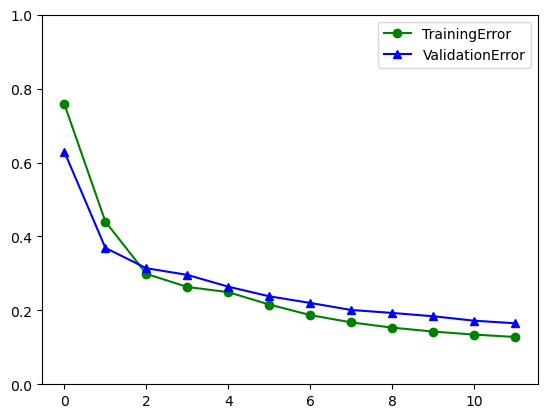

In [238]:
# c) Ebene mit Con1 5x5 Kernel
model = Sequential()

# Fügt Ebene für Ebene zum Modell hinzu (Von Input zu Output)

model.add(Input(input_shape)) # Selbst hinzugefügt, da deprecation Warning mit input_shape = input_shape in Conv2D
model.add(Conv2D(32, kernel_size=(5, 5), # Filter, Kernel-Size
                activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25)) # Dropout-Rate: 25% Wahrscheinlichkeit ein Output fallen zu lassen
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Konfigurieren des Modells
# - legt loss Funktion fest
# - sowie den Optimierungsallgorithmus
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(), 
              metrics=['accuracy'])

print("Model parameters = %d" % model.count_params())
print(model.summary())


# XX Modell ausführen
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, # führt zum print output)
                    validation_data=(x_val, y_val)) # Testset hier als Validationset angegeben

# Evaluiert das Modell anhand des Testdatensatzes :D
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


# XX Modell visualisieren
import matplotlib.pyplot as plt

train_err_loss = [1-acc for acc in history.history["accuracy"]]
val_err_loss = [1-acc for acc in history.history["val_accuracy"]]

fig5 = plt.plot(figsize=(4,8))
line1 = plt.plot(range(0, 12), train_err_loss, "-o", color='green', label="TrainingError")
line2 =plt.plot(range(0, 12), val_err_loss, "-^", color="blue", label="ValidationError")
plt.ylim(0, 1)
plt.legend()


Model parameters = 188746


Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_107 (Conv2D)             │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_108 (Conv2D)             │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_109 (Conv2D)             │ (None, 9, 9, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_40 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_66 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188,746 (737.29 KB)

 Trainable params: 188,746 (737.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.1074 - loss: 2.3040 - val_accuracy: 0.1376 - val_loss: 2.2881
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.1204 - loss: 2.2930 - val_accuracy: 0.1808 - val_loss: 2.2778
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.1428 - loss: 2.2823 - val_accuracy: 0.2609 - val_loss: 2.2672
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.1553 - loss: 2.2733 - val_accuracy: 0.3521 - val_loss: 2.2554
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.1753 - loss: 2.2608 - val_accuracy: 0.4340 - val_loss: 2.2419
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.1973 - loss: 2.2484 - val_accuracy: 0.4912 - val_loss: 2.2260
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.2193 - loss: 2.2335 - val_accuracy: 0.5302 - val_loss: 2.2073
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.2440 - loss: 2.21

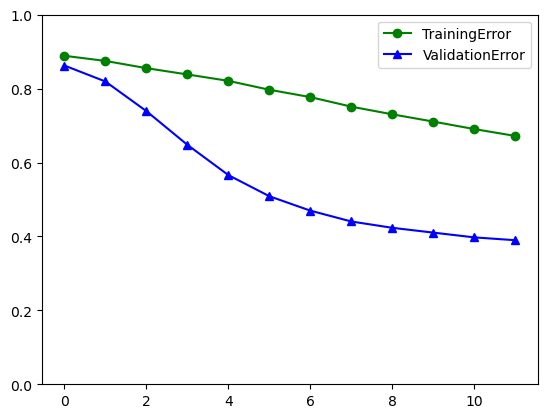

In [304]:
# Bestes Modell aus Experiment 1:

modelb = Sequential()
modelb.add(Conv2D(32, kernel_size=(5, 5),
                  activation='relu', input_shape=input_shape))
modelb.add(Conv2D(64, (3, 3), activation='relu'))
modelb.add(MaxPooling2D(pool_size=(2, 2)))
modelb.add(Dropout(0.25))
modelb.add(Conv2D(64, (3, 3), activation='relu'))
modelb.add(MaxPooling2D(pool_size=(2, 2)))
modelb.add(Dropout(0.25))
modelb.add(Flatten())
modelb.add(Dense(128, activation='relu'))
modelb.add(Dropout(0.5))
modelb.add(Dense(num_classes, activation='softmax'))

modelb.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(), 
              metrics=['accuracy'])

print("Model parameters = %d" % modelb.count_params())
print(modelb.summary())


# XX Modell ausführen
history = modelb.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, # führt zum print output)
                    validation_data=(x_test, y_test)) # Testset hier als Validationset angegeben

# Evaluiert das Modell anhand des Testdatensatzes :D
score = modelb.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


# XX Modell visualisieren
import matplotlib.pyplot as plt

train_err_loss = [1-acc for acc in history.history["accuracy"]]
val_err_loss = [1-acc for acc in history.history["val_accuracy"]]

fig5 = plt.plot(figsize=(4,8))
line1 = plt.plot(range(0, 12), train_err_loss, "-o", color='green', label="TrainingError")
line2 =plt.plot(range(0, 12), val_err_loss, "-^", color="blue", label="ValidationError")
plt.ylim(0, 1)
plt.legend()
